<a href="https://colab.research.google.com/github/Noodle96/Topicos_Inteligencia_Artificial/blob/main/utils_topics/gradiente_descendiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from numpy.random import randint
from numpy import linspace

In [9]:
# Ejemplo del gradiente descendente aplicado a la función y = x^2 + 1
# La ecuación matemática para el gradiente (derivada) es = 2*x

x_inicial = randint(10)
print('x_inicial = ', str(x_inicial))
alpha = 0.1
n_iteraciones = 15
iteraciones = []
y = []
print(type(iteraciones))
print(type(y))

x = x_inicial
print("x: ",x)

x_inicial =  3
<class 'list'>
<class 'list'>
x:  3


------------------------
iteración  1
x =  2.4 , y =  6.76
------------------------
iteración  2
x =  1.92 , y =  4.6864
------------------------
iteración  3
x =  1.536 , y =  3.359296
------------------------
iteración  4
x =  1.2288000000000001 , y =  2.50994944
------------------------
iteración  5
x =  0.9830400000000001 , y =  1.9663676416000002
------------------------
iteración  6
x =  0.7864320000000001 , y =  1.618475290624
------------------------
iteración  7
x =  0.6291456000000001 , y =  1.39582418599936
------------------------
iteración  8
x =  0.5033164800000001 , y =  1.2533274790395905
------------------------
iteración  9
x =  0.40265318400000005 , y =  1.1621295865853378
------------------------
iteración  10
x =  0.32212254720000005 , y =  1.1037629354146163
------------------------
iteración  11
x =  0.25769803776000005 , y =  1.0664082786653544
------------------------
iteración  12
x =  0.20615843020800004 , y =  1.0425012983458268
------------------------
iter

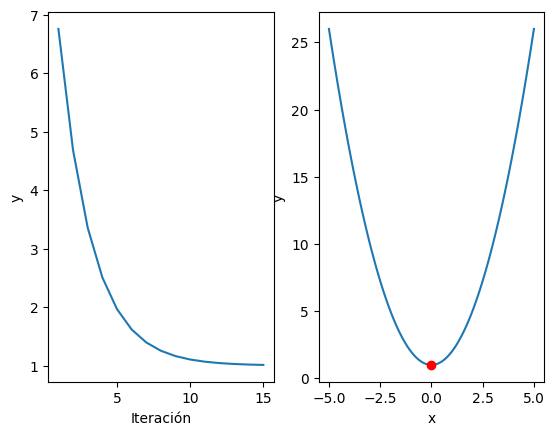

In [10]:
for i in range(n_iteraciones):
	print('------------------------')
	print('iteración ', str(i+1))

	# Calcular gradiente
	gradiente = 2*x

	# Actualizar "x" usando gradiente descendente
	x = x - alpha*gradiente

	# Almacenar iteración y valor correspondiente
	y.append(x**2 + 1)
	iteraciones.append(i+1)

	# Imprimir resultados
	print('x = ', str(x), ', y = ', str(x**2+1))

plt.subplot(1,2,1)
plt.plot(iteraciones,y)
plt.xlabel('Iteración')
plt.ylabel('y')

X = linspace(-5,5,100)
Y = X**2 + 1
plt.subplot(1,2,2)
plt.plot(X,Y,0.0,1.0,'ro')
plt.xlabel('x')
plt.ylabel('y')

plt.show()